In [100]:
from sklearn.neural_network import MLPRegressor
import pandas
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#from statsmodels.sandbox.regression.predstd import wls_prediction_st
import pandas 
from rdkit import Chem
import numpy 
import matplotlib.pyplot as plt
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [101]:
data_source = "/home/oli/PycharmProjects/cheminformatics/data/"
data =  pandas.read_csv(data_source + 'raw/training_subset.csv')
data1 = data.copy()
data1['Solubility'] = numpy.log10(data1['S0 (mM)'])
data1 = data1.drop(columns=['S0 (mM)'])

In [102]:
data =  pandas.read_csv(data_source + 'raw/processed_test_subset.csv')
data2 = data.copy()
a = np.asarray(data2['S (_g/L)'])
b = np.asarray(data2['MW'])
test_labels = []
for i in range(a.shape[0]):
        test_labels.append(np.log10(float(1000*float(a[i,])/float(b[i]))))
data2['Solubility'] = test_labels
data2 = data2.drop(columns=['S (_g/L)'])

In [103]:
smiles = data1['SMILES']
smiles1 = data2['SMILES']

In [104]:
mols = [Chem.MolFromSmiles(j) for j in smiles]
mols1 =  [Chem.MolFromSmiles(j) for j in smiles1]

In [105]:
fps = [AllChem.GetMorganFingerprintAsBitVect(k, 2) for k in mols]
fps1 = [AllChem.GetMorganFingerprintAsBitVect(k, 2) for k in mols1]

In [106]:
fp_np = []
for n in fps:
    
    arr = numpy.zeros((1,))
    DataStructs.ConvertToNumpyArray(n, arr)
    fp_np.append(arr)

fp_np1 = []
for n in fps1:

    arr = numpy.zeros((1,))
    DataStructs.ConvertToNumpyArray(n, arr)
    fp_np1.append(arr)


In [107]:
activity = data1.Solubility.values
activity1 = data2.Solubility.values

In [108]:
flt_activity = []

for n in range(len(activity)):
    
    flt_activity.append(float(activity[n]))

flt_activity1 = []

for n in range(len(activity1)):

    flt_activity1.append(float(activity1[n]))

In [109]:
#train_features, test_features, train_labels, test_labels = train_test_split(fp_np, flt_activity, test_size=0.33,
#                                                                            random_state=42)
X = np.asarray(fp_np)
y = flt_activity
X1 =np.asarray(fp_np1)
y1 = flt_activity1


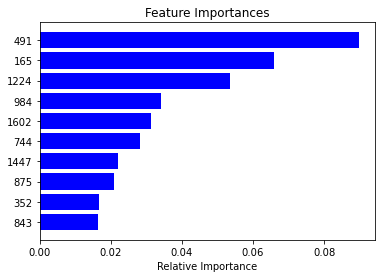

(85, 2048)
(85, 10)
Train Data Score : 0.5034581631231545
Test Data Score : -0.5072955427567083
0.5034581631231545
-0.5072955427567083
[1860, 1952, 1946, 1339, 1944, 1490, 1351, 1519, 1354, 1335]




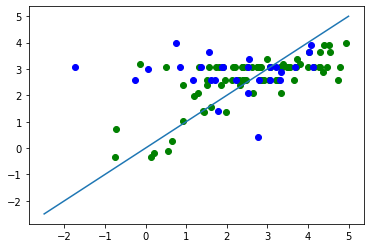

In [110]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)
features = [i for i in range(X.shape[1])]
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.fit_transform(X)
#X1 = scaler.transform(X1)
print(X.shape)
X_reduced = []
X1_reduced = []
for i in range(10):
    X_reduced.append(X[:,indices[i]])
    X1_reduced.append(X1[:,indices[i]])
X_reduced = np.asarray(X_reduced).T
X1_reduced = np.asarray(X1_reduced).T
print(X_reduced.shape)
reg = LinearRegression().fit(X_reduced,y)
#coeff_df = pandas.DataFrame(reg.coef_, ['MW','Sv','Si','nHDon','nHAcc','Hy'], columns=['Coefficient'])
#print(coeff_df)
print('Train Data Score :',reg.score(X_reduced, y))
print('Test Data Score :',reg.score(X1_reduced,y1))
plt.scatter(y, reg.predict(X_reduced), color='g')
plt.scatter(y1, reg.predict(X1_reduced), color='b')
plt.plot([-2.5,5], [-2.5,5])
plt.show()


print(reg.score(X_reduced,y))
print(reg.score(X1_reduced,y1))

importance = []
for i in range(10):
    importance.append(np.argsort(importances).tolist().index(i))

print(importance)

#
#
#model = sm.OLS(y,X)
#results = model.fit()
#print('Ordinary Least Squares Regression : Train data')
#print(results.summary())
#
#model = sm.OLS(y1,X1)
#results = model.fit()
#print('Ordinary Least Squares Regression : Test data')
#print(results.summary())
#
print('\n')